<h1 align='center'>10.3 Split-Apply-Combine and Pivot Tables

<b>Split-Apply-Combine

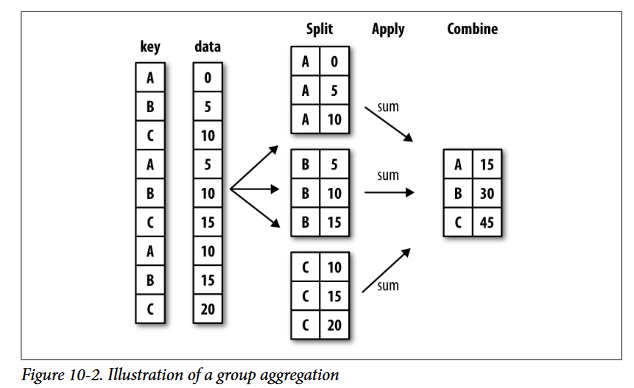

apply splits the object being manipulatedinto pieces, invokes the passed function on each piece, and then attempts to concate‐nate the pieces together

In [9]:
import pandas as pd 
import numpy as np

tips=pd.read_csv(r"E:\Datasets\tips.csv")

In [10]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [11]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

In [12]:
top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [13]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

If you pass a function to apply that takes other arguments or keywords, you can passthese after the function

The  top  function  is  called  on  each  row  group  from  theDataFrame, and then the results are glued together using pandas.concat, labeling thepieces  with  the  group  names.  The  result  therefore  has  a  hierarchical  index  whoseinner level contains index values from the original DataFrame

In [14]:
tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [19]:
result = tips.groupby('smoker')['tip_pct'].describe()

In [20]:
result.unstack('smoker')

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

1. Suppressing the Group Keys

In  the  preceding  examples,  you  see  that  the  resulting  object  has  a  hierarchical  indexformed  from  the  group  keys  along  with  the  indexes  of  each  piece  of  the  originalobject. You can disable this by passing group_keys=False to groupby

In [21]:
tips.groupby('smoker', group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


2. Quantile and Bucket Analysis

In [22]:
frame = pd.DataFrame({'data1': np.random.randn(1000),
                      'data2': np.random.randn(1000)})

In [23]:
quartiles = pd.cut(frame.data1, 4)

In [24]:
quartiles[:10]

0    (-1.763, -0.109]
1      (1.545, 3.199]
2     (-0.109, 1.545]
3      (1.545, 3.199]
4     (-0.109, 1.545]
5     (-0.109, 1.545]
6     (-0.109, 1.545]
7    (-1.763, -0.109]
8     (-0.109, 1.545]
9      (1.545, 3.199]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.424, -1.763] < (-1.763, -0.109] < (-0.109, 1.545] < (1.545, 3.199]]

The  Categorical  object  returned  by  cut  can  be  passed  directly  to  groupby.  So  wecould compute a set of statistics for the data2 column like so

In [25]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
    'count': group.count(), 'mean': group.mean()}

In [26]:
grouped = frame.data2.groupby(quartiles)

In [27]:
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
"(-3.424, -1.763]",-2.265886,2.035418,37.0,-0.045870
"(-1.763, -0.109]",-2.897523,2.783717,431.0,-0.049622
"(-0.109, 1.545]",-2.673532,3.412842,475.0,0.006181
"(1.545, 3.199]",-1.955204,2.374304,57.0,0.136759


These  were  equal-length  buckets;  to  compute  equal-size  buckets  based  on  samplequantiles, use qcut. I’ll pass labels=False to just get quantile numbers:

In [28]:
grouping = pd.qcut(frame.data1, 10, labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,min,max,count,mean
data1,,,,
0,-2.265886,2.595149,100.0,-0.142928
1,-2.604176,2.783717,100.0,-0.087073
2,-2.897523,2.705500,100.0,-0.175598
3,-2.487005,2.116790,100.0,0.040546
4,-2.320023,2.775185,100.0,0.063054
5,-2.667444,2.228783,100.0,0.048888
6,-1.695421,2.741146,100.0,0.153579
7,-2.150786,3.412842,100.0,-0.042757
8,-2.673532,2.573158,100.0,-0.054571


Example: Filling Missing Values with Group-Specific Values

When  cleaning  up  missing  data,  in  some  cases  you  will  replace  data  observationsusing  dropna,  but  in  others  you  may  want  to  impute  (fill  in)  the  null  (NA)  valuesusing  a  fixed  value  or  some  value  derived  from  the  data.  fillna  is  the  right  tool  touse

In [29]:
s = pd.Series(np.random.randn(6))

In [30]:
s[::2] = np.nan

In [31]:
s.fillna(s.mean())

0    0.492853
1    0.565342
2    0.492853
3    1.542923
4    0.492853
5   -0.629705
dtype: float64

Suppose you need the fill value to vary by group. One way to do this is to group thedata  and  use  apply  with  a  function  that  calls  fillna  on  each  data  chunk.  

In [48]:
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']

In [59]:
group_key = ['East'] * 5 + ['West'] * 3

In [60]:
data = pd.Series(np.random.randn(8), index=states)

In [61]:
data

Ohio          0.298599
New York     -0.668748
Vermont       1.943511
Florida      -1.770106
Oregon        0.325344
Nevada        0.238262
California    1.615794
Idaho         1.014893
dtype: float64

In [62]:
data[['Vermont', 'Nevada', 'Idaho']] = np.nan

In [63]:
data.groupby(group_key).mean()

East   -0.453728
West    1.615794
dtype: float64

We can fill the NA values using the group means like so

In [64]:
fill_mean = lambda g: g.fillna(g.mean())

In [65]:
data.groupby(group_key).apply(fill_mean)

Ohio          0.298599
New York     -0.668748
Vermont      -0.453728
Florida      -1.770106
Oregon        0.325344
Nevada        1.615794
California    1.615794
Idaho         1.615794
dtype: float64

In  another  case,  you  might  have  predefined  fill  values  in  your  code  that  vary  bygroup. Since the groups have a name attribute set internally, we can use that

In [66]:
fill_values = {'East': 0.5, 'West': -1}

In [67]:
fill_func = lambda g: g.fillna(fill_values[g.name])

In [68]:
data.groupby(group_key).apply(fill_func)

Ohio          0.298599
New York     -0.668748
Vermont       0.500000
Florida      -1.770106
Oregon        0.325344
Nevada       -1.000000
California    1.615794
Idaho        -1.000000
dtype: float64

Example: Random Sampling and Permutation

So now we have a Series of length 52 whose index contains card names and values

In [71]:
suits = ['H', 'S', 'C', 'D']
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'K', 'Q']
cards = []
for suit in ['H', 'S', 'C', 'D']:    
    cards.extend(str(num) + suit for num in base_names)
    
deck = pd.Series(card_val, index=cards)

In [73]:
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [74]:
def draw(deck, n=5):
    return deck.sample(n)

In [75]:
draw(deck)

6S    6
8D    8
7D    7
6D    6
2H    2
dtype: int64

Suppose  you  wanted  two  random  cards  from  each  suit.  Because  the  suit  is  the  lastcharacter of each card name, we can group based on this and use apply

In [76]:
get_suit = lambda card: card[-1]

In [77]:
deck.groupby(get_suit).apply(draw, n=2)

C  JC     10
   2C      2
D  3D      3
   2D      2
H  4H      4
   10H    10
S  10S    10
   KS     10
dtype: int64

OR

In [78]:
deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

5C     5
JC    10
3D     3
KD    10
JH    10
8H     8
3S     3
5S     5
dtype: int64

Example: Group Weighted Average and Correlation

In [79]:
df = pd.DataFrame({'category': ['a', 'a', 'a', 'a','b', 'b', 'b', 'b'],
                   'data': np.random.randn(8),
                   'weights': np.random.rand(8)})

In [80]:
df

,category,data,weights
0,a,-1.549032,0.906274
1,a,0.431060,0.893049
2,a,-1.953850,0.927460
3,a,-0.672907,0.050186
4,b,0.254596,0.102777
5,b,-0.162661,0.809765
6,b,1.225648,0.249771
7,b,-1.233961,0.959249


In [81]:
grouped = df.groupby('category')

In [82]:
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])

In [83]:
grouped.apply(get_wavg)

category
a   -1.031621
b   -0.463383
dtype: float64

In [84]:
close_px = pd.read_csv(r'E:/Datasets/stock_px_2.csv', 
                       parse_dates=True,index_col=0)

In [85]:
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [86]:
close_px[-4:]

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


One task of interest might be to compute a DataFrame consisting of the yearly corre‐lations of daily returns (computed from percent changes) with SPX.

In [87]:
spx_corr = lambda x: x.corrwith(x['SPX'])

In [89]:
rets = close_px.pct_change().dropna()

In [90]:
get_year = lambda x: x.year

In [91]:
by_year = rets.groupby(get_year)

In [92]:
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [93]:
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

Example: Group-Wise Linear Regression

In [102]:
import statsmodels.api as smdef 

In [103]:
def regress(data, yvar, xvars):    
    Y = data[yvar]    
    X = data[xvars]    
    X['intercept'] = 1.    
    result = smdef.OLS(Y,X).fit()
    return result.params

In [104]:
by_year.apply(regress, 'AAPL', ['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


<b>Pivot Tables and Cross-Tabulation

A pivot table is a data summarization tool frequently found in spreadsheet programsand  other  data  analysis  software.  

It  aggregates  a  table  of  data  by  one  or  more  keys,arranging  the  data  in  a  rectangle  with  some  of  the  group  keys  along  the  rows  andsome  along  the  columns.  

Pivot  tables  in  Python  with  pandas  are  made  possiblethrough the groupby facility described in this chapter combined with reshape opera‐tions  utilizing  hierarchical  indexing.  

DataFrame  has  a  pivot_table  method,  andthere  is  also  a  top-level  pandas.pivot_table  function.  

In  addition  to  providing  aconvenience interface to groupby, pivot_table can add partial totals, also known asmargins.

In [105]:
tips.pivot_table(index=['day', 'smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [107]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker')

size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

We  could  augment  this  table  to  include  partial  totals  by  passing  margins=True.  

This has the effect of adding All row and column labels, with corresponding values beingthe group statistics for all the data within a single tier

In [108]:
tips.pivot_table(['tip_pct', 'size'], index=['time', 'day'],
                 columns='smoker', margins=True)

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

Here,  the  All  values  are  means  without  taking  into  account  smoker  versus  non-smoker (the All columns) or any of the two levels of grouping on the rows (the Allrow).To  use  a  different  aggregation  function,  pass  it  to  aggfunc.  For  example,  'count'  orlen will give you a cross-tabulation (count or frequency) of group sizes

In [109]:
tips.pivot_table('tip_pct', index=['time', 'smoker'], columns='day',
                 aggfunc=len, margins=True)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

If  some  combinations  are  empty  (or  otherwise  NA),  you  may  wish  to  pass  afill_value:

In [110]:
tips.pivot_table('tip_pct', index=['time', 'size', 'smoker'],
                 columns='day', aggfunc='mean', fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

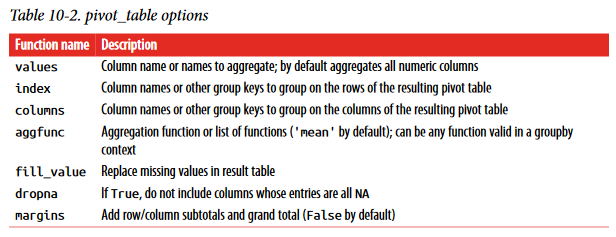

Cross-Tabulations: Crosstab

cross-tabulation  (or  crosstab  for  short)  is  a  special  case  of  a  pivot  table  that  com‐putes group frequencies. Here is an example

In [114]:
pd.crosstab(tips.smoker, tips.tip, margins=True)

tip,1.0,1.01,1.1,1.17,1.25,1.32,1.36,1.44,1.45,1.47,...,5.85,5.92,6.0,6.5,6.7,6.73,7.58,9.0,10.0,All
smoker,,,,,,,,,,,,,,,,,,,,,
No,1,1,0,0,3,1,1,1,1,1,...,1,1,1,0,1,1,1,1,0,151
Yes,3,0,1,1,0,0,0,1,0,0,...,0,0,0,2,0,0,0,0,1,93
All,4,1,1,1,3,1,1,2,1,1,...,1,1,1,2,1,1,1,1,1,244


In [115]:
pd.crosstab([tips.time, tips.day], tips.smoker, margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244